# Restaurant Chain

## Objectives
- Identify if there are any restaurant chains present in the dataset.
- Analyze the ratings and popularity of different restaurant chains.

## Methodology
- Group by Restaurant Name and count occurrences to find chains to Identify Restaurant Chains.
- Calculate the average rating for each chain.
- Sum the Votes column to measure the popularity of each chain.
- Create bar charts to show the top chains by number of locations, average ratings, and total votes.

In [1]:
# Loading Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import folium

# Loading Cleaned Dataset

df_cleaned = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Data_Analyst\Cognifyz_Test\Dataset\Cleaned_Dataset.csv')

In [2]:
# Identify restaurant chains
chains = df_cleaned['Restaurant Name'].value_counts()
chain_restaurants = chains[chains > 1]  # Restaurants with more than one location
print("Number of chains:", len(chain_restaurants)) 

Number of chains: 734


In [3]:
# Merge chain data for analysis
chain_data = df_cleaned[df_cleaned['Restaurant Name'].isin(chain_restaurants.index)]

# Analyze average ratings and popularity
chain_analysis = (
    chain_data.groupby('Restaurant Name')
    .agg(
        Avg_Rating=('Aggregate rating', 'mean'),
        Total_Votes=('Votes', 'sum'),
        Locations=('Restaurant ID', 'count')
    )
    .sort_values(by='Locations', ascending=False)
)

# Top chains by number of locations
top_chains = chain_analysis.head(10)
print(top_chains)

                  Avg_Rating  Total_Votes  Locations
Restaurant Name                                     
Cafe Coffee Day     2.419277         2428         83
Domino's Pizza      2.740506         6643         79
Subway              2.907937         6124         63
Green Chick Chop    2.672549          964         51
McDonald's          3.339583         5291         48
Keventers           2.870588         1263         34
Pizza Hut           3.320000         4961         30
Giani               2.689655          854         29
Baskin Robbins      1.860714          428         28
Barbeque Nation     4.353846        28142         26


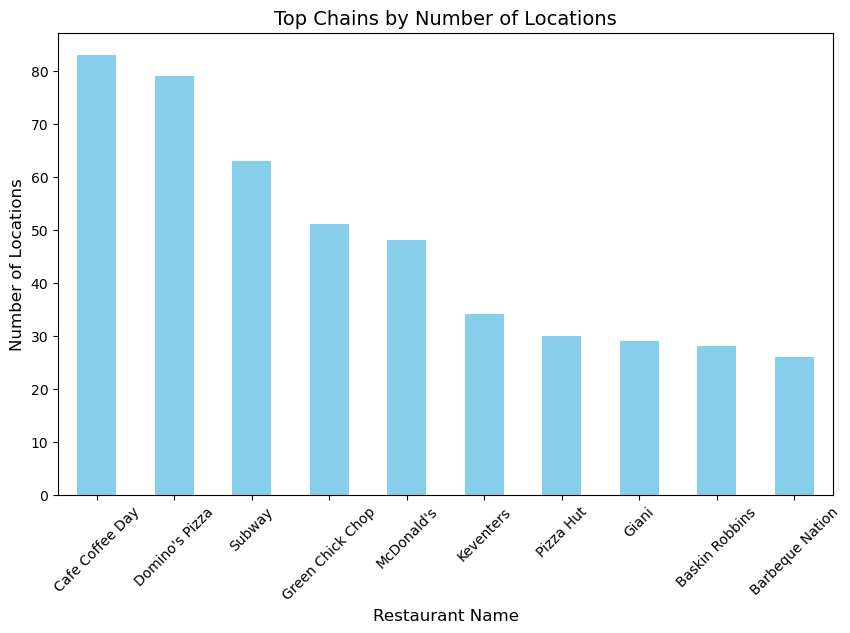

In [4]:
# Top chains by number of locations
plt.figure(figsize=(10,6))
top_chains['Locations'].plot(kind='bar', color='skyblue')
plt.title("Top Chains by Number of Locations", fontsize=14)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Number of Locations", fontsize=12)
plt.xticks(rotation=45)
plt.show()

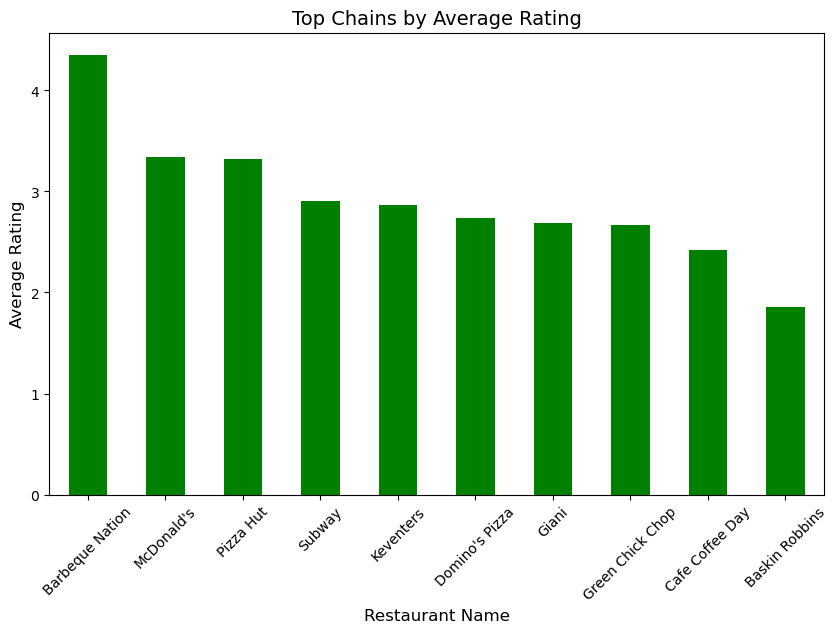

In [5]:
# Top chains by average rating
plt.figure(figsize=(10,6))
top_chains.sort_values(by='Avg_Rating', ascending=False)['Avg_Rating'].plot(kind='bar', color='green')
plt.title("Top Chains by Average Rating", fontsize=14)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45)
plt.show()

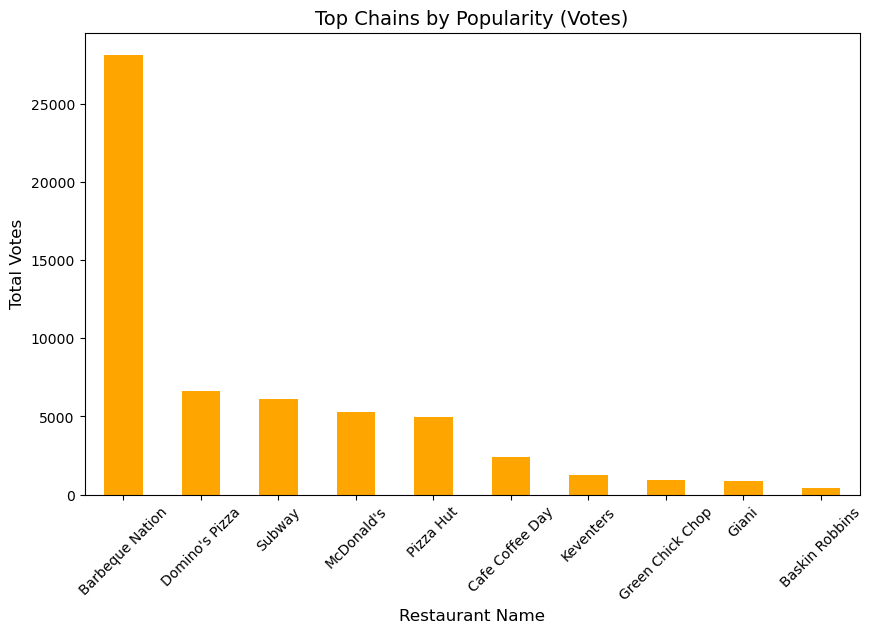

In [6]:
# Top chains by popularity (votes)
plt.figure(figsize=(10,6))
top_chains.sort_values(by='Total_Votes', ascending=False)['Total_Votes'].plot(kind='bar', color='orange')
plt.title("Top Chains by Popularity (Votes)", fontsize=14)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Total Votes", fontsize=12)
plt.xticks(rotation=45)
plt.show()